In [14]:
import pandas as pd
# Loading dataset (header row is row 2 in the Excel file)
df = pd.read_excel("Raw Data.xls",header=1)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1306 entries, 0 to 1305
Data columns (total 42 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                                   

In [15]:
df.head()
df.columns


Index(['1. Year of birth:', '2. Gender',
       '3. What is the socio-economic status of your home?',
       '4. According to your culture, people, or physical features, you are or are recognized as:',
       '5.1 How many years of education did your parents receive? Father',
       '5.2 How many years of education did your parents receive? Mother',
       '6. In general, how satisfied are you with all aspects of your life?',
       '7. How happy did you feel yesterday?',
       '8. How much did you laugh yesterday?',
       '9. Did you learn new or exciting  things yesterday?',
       '10. How much did you enjoy the activities you did yesterday?',
       '11. How worried did you feel yesterday?\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
       '12. How depressed did you feel yesterday?',
       '13. How angry did you feel yesterday?\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
       '14. How much stress did you feel yesterday?\t\t\t\t\t\t\t\t\t\t\t\t\t\t',
       '15. How lonely or unsupported did

In [26]:
rename_map = {
    '1. Year of birth:': 'birth_year',
    '2. Gender': 'gender',
    '3. What is the socio-economic status of your home?': 'SES',
    '4. According to your culture, people, or physical features, you are or are recognized as:': 'ethnicity',
    '5.1 How many years of education did your parents receive? Father': 'father_edu',
    '5.2 How many years of education did your parents receive? Mother': 'mother_edu',
    '6. In general, how satisfied are you with all aspects of your life?': 'life_satisfaction',
    '7. How happy did you feel yesterday?': 'happiness',
    '8. How much did you laugh yesterday?': 'laughter',
    '9. Did you learn new or exciting  things yesterday?': 'learning',
    '10. How much did you enjoy the activities you did yesterday?': 'enjoyment',
    '11. How worried did you feel yesterday?': 'worry',
    '12. How depressed did you feel yesterday?': 'depression',
    '13. How angry did you feel yesterday?': 'anger',
    '14. How much stress did you feel yesterday?': 'stress',
    '15. How lonely or unsupported did you feel yesterday?': 'loneliness',

    # PSS
    '16.1 Next, you will be asked questions ... happened unexpectedly?': 'PSS1',
    '16.2 Next, you will be asked questions ... unable to control important things?': 'PSS2',
    '16.3 Next, you will be asked questions ... nervous and stressed?': 'PSS3',
    '16.4 Next, you will be asked questions ... confident to handle problems?': 'PSS4',
    '16.5 Next, you will be asked questions ... things going your way?': 'PSS5',
    '16.6 Next, you will be asked questions ... could not cope with tasks?': 'PSS6',
    '16.7 Next, you will be asked questions ... control irritations?': 'PSS7',
    '16.8 Next, you will be asked questions ... felt on top of things?': 'PSS8',
    '16.9 Next, you will be asked questions ... angered by things outside control?': 'PSS9',
    '16.10 Next, you will be asked questions ... felt difficulties piling up?': 'PSS10',

    # GAD-7
    '17.1 Next, ... Feeling nervous, anxious, or on edge': 'GAD1',
    '17.2 Next, ... Not being able to stop or control worrying': 'GAD2',
    '17.3 Next, ... Worrying too much about different things': 'GAD3',
    '17.4 Next, ... Trouble relaxing': 'GAD4',
    '17.5 Next, ... Being so restless that it is hard to sit still': 'GAD5',
    '17.6 Next, ... Becoming easily annoyed or irritable': 'GAD6',
    '17.7 Next, ... Feeling afraid, as if something awful might happen': 'GAD7',

    # PHQ-9
    '18.1 Next, ... Little interest or pleasure in doing things': 'PHQ1',
    '18.2 Next, ... Feeling down, depressed, or hopeless': 'PHQ2',
    '18.3 Next, ... Trouble falling or staying asleep, or sleeping too much': 'PHQ3',
    '18.4 Next, ... Feeling tired or having little energy': 'PHQ4',
    '18.5 Next, ... Poor appetite or overeating': 'PHQ5',
    '18.6 Next, ... Feeling bad about yourself or that you are a failure': 'PHQ6',
    '18.7 Next, ... Trouble concentrating on things': 'PHQ7',
    '18.8 Next, ... Moving/speaking slowly OR very restless': 'PHQ8',
    '18.9 Next, ... Thoughts of being better off dead / self-harm': 'PHQ9',
}


In [31]:
df = df.rename(columns=rename_map)


In [32]:
# Rename PSS
for i in range(1, 11):
    df = df.rename(columns=lambda x: f'PSS{i}' if x.strip().startswith(f"16.{i}") else x)

# Rename GAD
for i in range(1, 8):
    df = df.rename(columns=lambda x: f'GAD{i}' if x.strip().startswith(f"17.{i}") else x)

# Rename PHQ
for i in range(1, 10):
    df = df.rename(columns=lambda x: f'PHQ{i}' if x.strip().startswith(f"18.{i}") else x)


In [33]:
df.columns

Index(['birth_year', 'gender', 'SES', 'ethnicity', 'father_edu', 'mother_edu',
       'life_satisfaction', 'happiness', 'laughter', 'learning', 'enjoyment',
       'worry', 'depression', 'anger', 'stress', 'loneliness', 'PSS1', 'PSS2',
       'PSS3', 'PSS4', 'PSS5', 'PSS6', 'PSS7', 'PSS8', 'PSS9', 'PSS10', 'GAD1',
       'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6', 'GAD7', 'PHQ1', 'PHQ2', 'PHQ3',
       'PHQ4', 'PHQ5', 'PHQ6', 'PHQ7', 'PHQ8', 'PHQ9'],
      dtype='object')

In [34]:
pss_items = [f"PSS{i}" for i in range(1, 11)]
gad_items = [f"GAD{i}" for i in range(1, 8)]
phq_items = [f"PHQ{i}" for i in range(1, 10)]

symptom_items = pss_items + gad_items + phq_items


In [35]:
df[symptom_items] = df[symptom_items].fillna(df[symptom_items].median())


In [51]:
df['age'] = 2022 - df['birth_year']

In [52]:
df['age_group'] = pd.cut(
    df['age'],
    bins=[17, 25, 35, 50, 120],
    labels=['18–25', '26–35', '36–50', '51+']
)


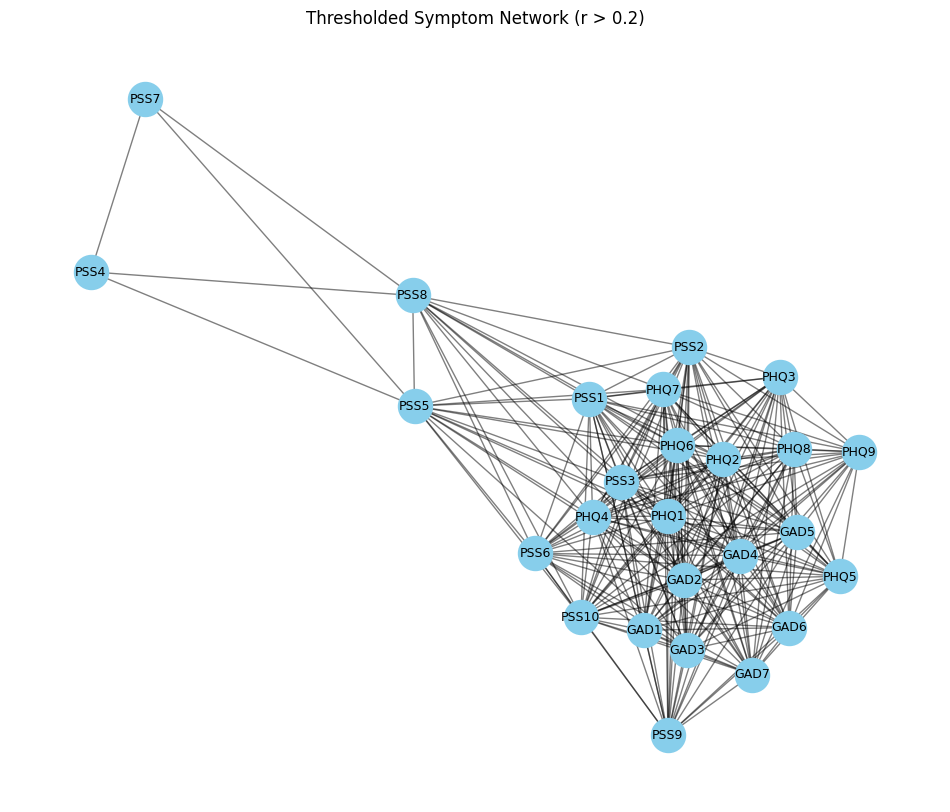

In [53]:
# Building full correlation matrix with absolute values
corr_matrix = df[symptom_items].corr().abs()

# Building initial graph
import networkx as nx
G = nx.from_pandas_adjacency(corr_matrix)

# Removing self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Thresholded graph
import matplotlib.pyplot as plt

threshold = 0.20
G_thresh = nx.Graph()

for u, v, d in G.edges(data=True):
    if d["weight"] > threshold:
        G_thresh.add_edge(u, v, weight=d["weight"])

# Removing isolated nodes
G_thresh.remove_nodes_from(list(nx.isolates(G_thresh)))

# Visualization
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_thresh, seed=42)

nx.draw_networkx_nodes(G_thresh, pos, node_color='skyblue', node_size=600)
nx.draw_networkx_edges(G_thresh, pos, alpha=0.5)
nx.draw_networkx_labels(G_thresh, pos, font_size=9)

plt.title(f"Thresholded Symptom Network (r > {threshold})")
plt.axis("off")
plt.show()


In [54]:
import networkx as nx

G = nx.from_pandas_adjacency(corr_matrix)
G.remove_edges_from(nx.selfloop_edges(G))


In [55]:
# Finding communities
from community import community_louvain

louvain_partition = community_louvain.best_partition(G, weight='weight')
louvain_partition


{'PSS1': 1,
 'PSS2': 1,
 'PSS3': 1,
 'PSS4': 1,
 'PSS5': 1,
 'PSS6': 1,
 'PSS7': 1,
 'PSS8': 1,
 'PSS9': 1,
 'PSS10': 1,
 'GAD1': 0,
 'GAD2': 0,
 'GAD3': 0,
 'GAD4': 0,
 'GAD5': 0,
 'GAD6': 0,
 'GAD7': 0,
 'PHQ1': 0,
 'PHQ2': 0,
 'PHQ3': 0,
 'PHQ4': 0,
 'PHQ5': 0,
 'PHQ6': 0,
 'PHQ7': 0,
 'PHQ8': 0,
 'PHQ9': 0}

In [56]:
import networkx as nx
from community import community_louvain

age_networks = {}
age_partitions = {}

age_groups = df['age_group'].dropna().unique()

for group in age_groups:
    sub = df[df['age_group'] == group]

    corr = sub[symptom_items].corr().abs()

    G_sub = nx.from_pandas_adjacency(corr)
    G_sub.remove_edges_from(nx.selfloop_edges(G_sub))

    age_networks[group] = G_sub
    age_partitions[group] = community_louvain.best_partition(G_sub, weight="weight")


In [57]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Defining correct order of age groups for consistent comparison
age_groups_ordered = ['18–25', '26–35', '36–50', '51+']

print("\nCommunity Similarity Across Age Groups (ARI & NMI):\n")

for i in range(len(age_groups_ordered)):
    for j in range(i+1, len(age_groups_ordered)):
        g1, g2 = age_groups_ordered[i], age_groups_ordered[j]

        # Extracting community labels
        labels1 = list(age_partitions[g1].values())
        labels2 = list(age_partitions[g2].values())

        # Computing ARI and NMI
        ari = adjusted_rand_score(labels1, labels2)
        nmi = normalized_mutual_info_score(labels1, labels2)

        print(f"{g1} vs {g2}:    ARI={ari:.3f}  , NMI={nmi:.3f}")



Community Similarity Across Age Groups (ARI & NMI):

18–25 vs 26–35:    ARI=0.698  , NMI=0.669
18–25 vs 36–50:    ARI=0.750  , NMI=0.689
18–25 vs 51+:    ARI=0.585  , NMI=0.561
26–35 vs 36–50:    ARI=0.705  , NMI=0.670
26–35 vs 51+:    ARI=0.460  , NMI=0.483
36–50 vs 51+:    ARI=0.701  , NMI=0.650


In [59]:
G_full = nx.from_pandas_adjacency(df[symptom_items].corr().abs())
pos = nx.spring_layout(G_full, seed=42)


In [60]:
def plot_age_group(group, G_sub, partition, pos):
    plt.figure(figsize=(10, 8))
    colors = [partition[node] for node in G_sub.nodes()]

    nx.draw_networkx_nodes(G_sub, pos, node_color=colors, cmap='viridis', node_size=600)
    nx.draw_networkx_edges(G_sub, pos, alpha=0.4)
    nx.draw_networkx_labels(G_sub, pos, font_size=9)

    plt.title(f"Louvain Symptom Network – Age Group: {group}")
    plt.axis("off")
    plt.show()


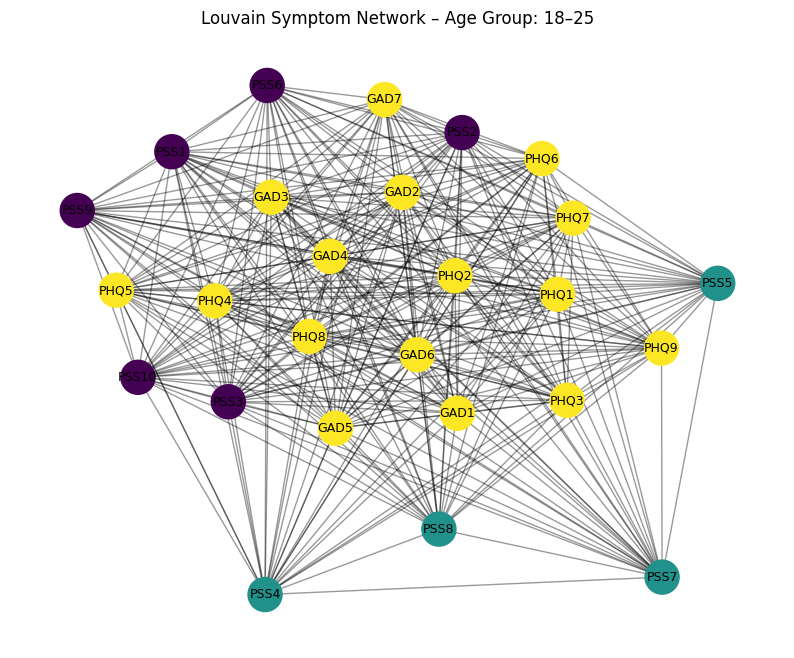

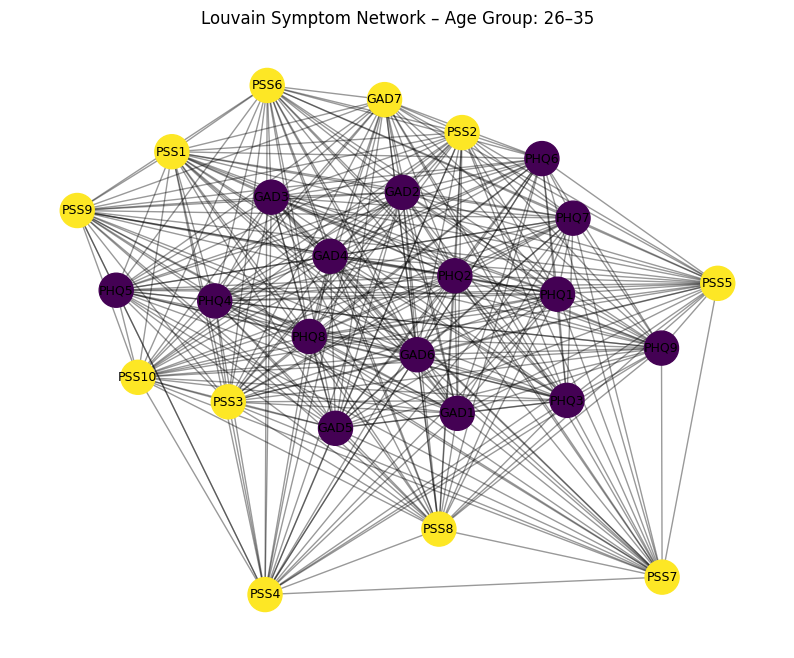

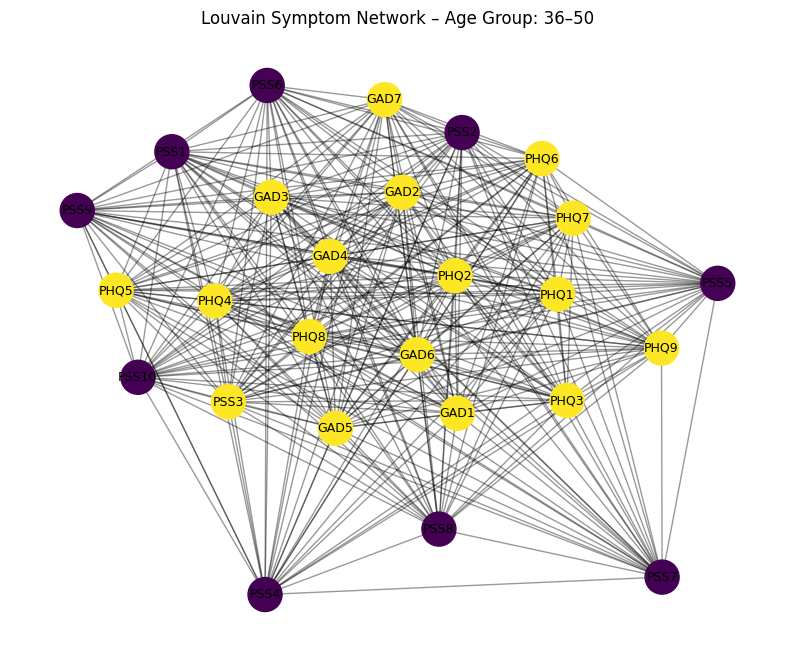

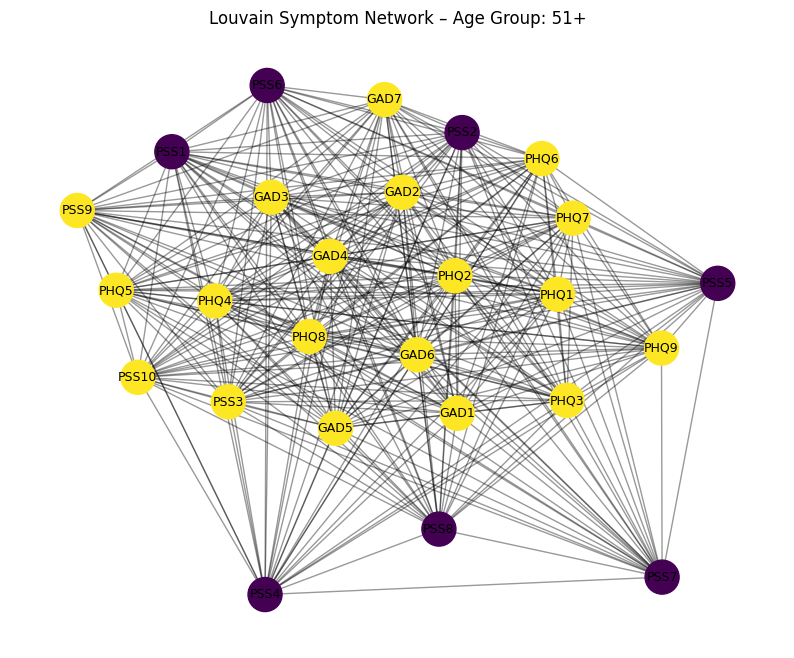

In [61]:
age_groups = ['18–25', '26–35', '36–50', '51+']

for group in age_groups:
    plot_age_group(group, age_networks[group], age_partitions[group], pos)
